In [142]:
!pip install patchify

Defaulting to user installation because normal site-packages is not writeable


In [143]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [144]:
minmaxscaler = MinMaxScaler()

In [145]:
current_working_directory = os.getcwd()
print(current_working_directory)

/home/scc/lennart.giessing


In [146]:
dataset_root_folder = '/home/scc/lennart.giessing'

In [147]:
dataset_name = "pictures_masks"

In [148]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1] # connect paths and files
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/home/scc/lennart.giessing/pictures_masks/Tile_1_multilable/masks


In [149]:
image_patch_size = 256 # This is the patch size we are lookinf for. 256 is the number of pixels. All images we are using. must be a multiple of 256 (512, ...)

In [150]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile_1_multilable/images/image_part_006.jpg',1)

In [151]:
image.shape # images have different shapes -> problem!

(677, 704, 3)

In [152]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [153]:
len(image_patches)

2

In [154]:
print(image_patches.shape)

(2, 2, 1, 256, 256, 3)


In [155]:
minmaxscaler = MinMaxScaler()

In [156]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [157]:
image_y[0].shape

(256, 256, 3)

In [158]:
print(type(image))

<class 'numpy.ndarray'>


In [159]:
type(Image.fromarray(image))

PIL.Image.Image

In [160]:
image.shape

(677, 704, 3)

In [161]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [167]:
image_dataset = [] # code deals with the images
mask_dataset = [] # and with the masks

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for image_id in range(1,50): # increased from 20 till 50 as i have more images in this
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile_1_multilable/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Turning from BGR to RGB


        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size # Calculate the size of the image that is divisible by the patch size.
        size_y = (image.shape[0]//image_patch_size)*image_patch_size # for example 2048. X and Y do not have to be the same size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image) # transform again from array to PIL(Python Imaging Library). More usefult o wotk with in python
        image = image.crop((0,0, size_x, size_y)) # Image cropping means to slize the image into a new size bsaed on the multiple of 256
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size) # now divide it into patches based on beeing a multiple of 256. 3 stands for the colours
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)# rehsapes to flat, scales the pixel values to sth. between 0 and 1
              individual_patched_image = individual_patched_image[0] # append to emtpy dataframe
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks': # patch the masks as well, but do not change their scale
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


[ WARN:0@159295.296] global loadsave.cpp:241 findDecoder imread_('/home/scc/lennart.giessing/pictures_masks/Tile_1_multilable/images/image_part_001.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159295.296] global loadsave.cpp:241 findDecoder imread_('/home/scc/lennart.giessing/pictures_masks/Tile_1_multilable/images/image_part_002.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159295.296] global loadsave.cpp:241 findDecoder imread_('/home/scc/lennart.giessing/pictures_masks/Tile_1_multilable/images/image_part_003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159295.296] global loadsave.cpp:241 findDecoder imread_('/home/scc/lennart.giessing/pictures_masks/Tile_1_multilable/images/image_part_004.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159295.296] global loadsave.cpp:241 findDecoder imread_('/home/scc/lennart.giessing/pictures_masks/Tile_1_multilable/images/image_part_005.jpg'): can't open/read file: check file 

In [168]:
print(len(image_dataset))
print(len(mask_dataset))

359
359


In [169]:
image_dataset = np.array(image_dataset) # turn into np. arrays again
mask_dataset = np.array(mask_dataset)

In [170]:
print(len(image_dataset))
print(len(mask_dataset))

359
359


In [171]:
type(image_dataset[0])

numpy.ndarray

In [172]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3))) # reshapes the patches into the correct size of 256

numpy.ndarray

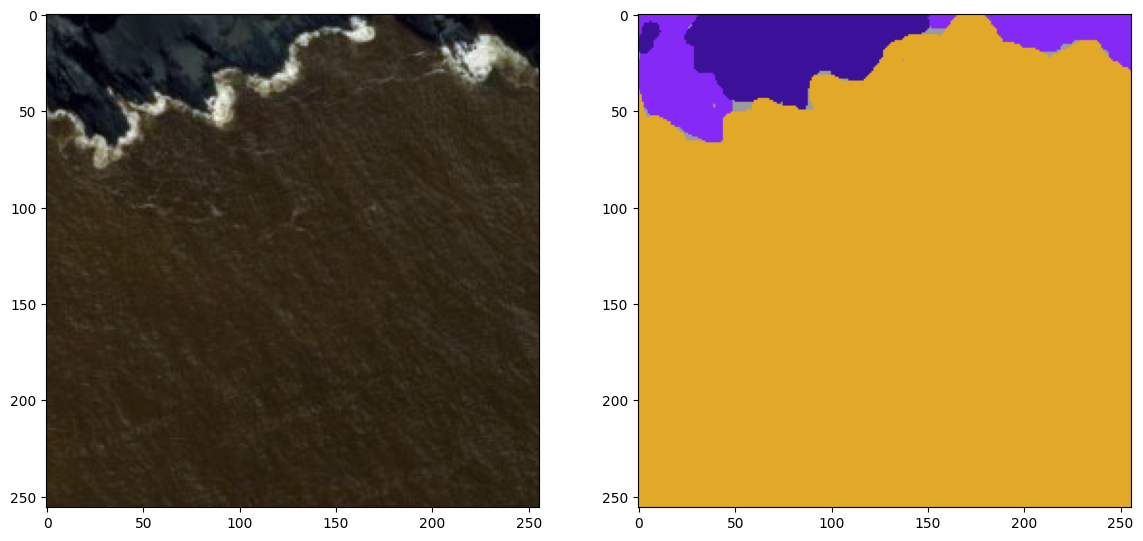

In [173]:
random.seed(20)

random_image_id = random.randint(0, len(image_dataset)) # select random image plus the belonging mask

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [174]:

# Create the one-hot encoding for our labels. One colour for each label
# Transfer to RGB
class_ice = '#3C1098' # Hex string representation
class_ice = class_ice.lstrip('#') # get rid of the #
class_ice = np.array(tuple(int(class_ice[i:i+2], 16) for i in (0,2,4))) # Split the value into its three segments: 3C 10 98
                                                                                  # convert each two-character hex string into an integer interpreting it as a base 16 Number (60, 16, 152) these are the RBG values necessary for the colours

print(class_ice)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_human = '#6EC1E4'
class_human = class_human.lstrip('#')
class_human = np.array(tuple(int(class_human[i:i+2], 16) for i in (0,2,4)))
print(class_human)

class_forest = '#FEDD3A'
class_forest = class_forest.lstrip('#')
class_forest = np.array(tuple(int(class_forest[i:i+2], 16) for i in (0,2,4)))
print(class_forest)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [175]:
mask_dataset.shape[0]

359

In [176]:
label = individual_patched_mask

In [177]:
def rgb_to_label(label):                         # Function to convert an RGB image into a labeled image where ecah pixel represents a specific class and not only the colour as before
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0 # based on colour value, assign a label
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_human, axis=-1)] = 2
  label_segment[np.all(label == class_ice, axis=-1)] = 3
  label_segment[np.all(label == class_forest, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0] # reduces the label from 3d into 2d because all channels have the same value. Not three different colour values anymore
  #print(label_segment)
  return label_segment

In [178]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [179]:
np.unique(labels) # these are the type of labels available

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [180]:
print(len(labels))

359


In [181]:
labels = np.array(labels)

In [182]:
labels[8] # check for the labels in that picture

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [183]:
labels = np.expand_dims(labels, axis=3) # turns the data into the format necessary for CNNS


In [184]:
labels[0]

array([[[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]],

       [[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]],

       [[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]],

       ...,

       [[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]],

       [[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]],

       [[4],
        [4],
        [4],
        ...,
        [4],
        [4],
        [4]]], dtype=uint8)

In [185]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [186]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


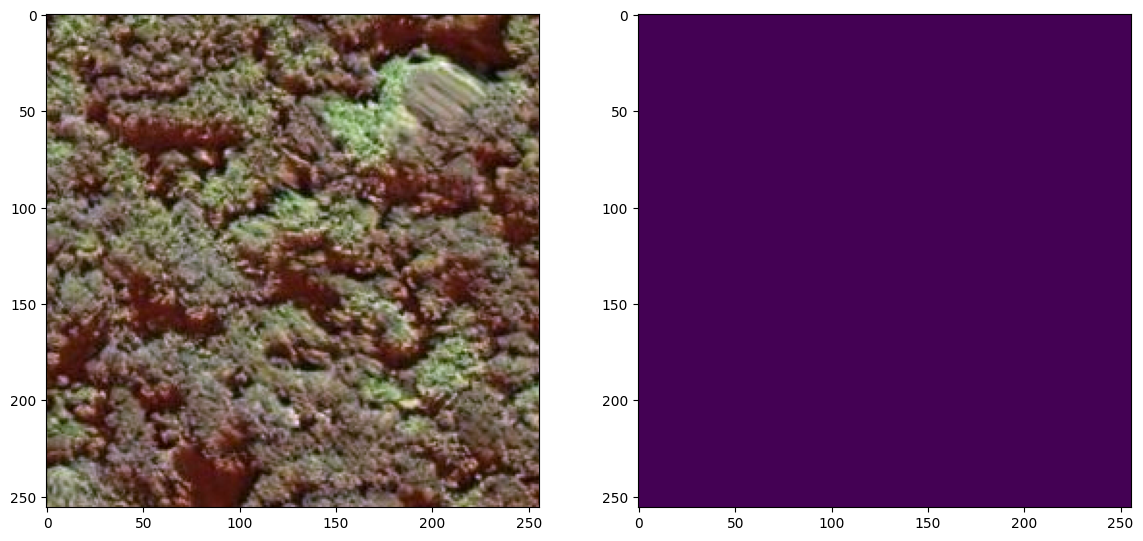

In [187]:
random.seed(2)
random_image_id = random.randint(0, len(image_dataset)) # plot the images and the changed masks

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [188]:
labels[0][:,:,0]

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=uint8)

In [189]:
total_classes = len(np.unique(labels)) # get the length of the unique classes

In [190]:
total_classes

6

In [191]:
from tensorflow.keras.utils import to_categorical # you need to provide the datatype and the number of labels

In [192]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes) #

In [193]:
labels_categorical_dataset.shape

(359, 256, 256, 6)

In [194]:
master_trianing_dataset = image_dataset #input dataset
master_trianing_dataset.shape

(359, 256, 256, 3)

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100) # 15% Test data

In [197]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(305, 256, 256, 3)
(54, 256, 256, 3)
(305, 256, 256, 6)
(54, 256, 256, 6)


In [198]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [199]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [200]:
!pip install -U segmentation-models

Defaulting to user installation because normal site-packages is not writeable


In [201]:
from keras.models import Model # gives us the scelleton for the calculation not doin the calculations
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose # Stuff necessary to create the Model
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda # get other methods

In [202]:
from keras import backend as K # calculations in the backend

In [203]:
 # the jaccard index calculates how good our prediction has been.
 # Divides the overlap of the predicted and real area with the union of the two regions
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0) # intersection/whole area
  return final_coef_value


In [204]:
#  Implementing U-Net Model


def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1): # define the input: labels: image height/width, just one channel

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs
# use some defaults, somethings we have to define ourselves
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input) #he_normal is one of the weight initialization methods. 3*3 convolutions folowed by arectified linear unit (Relu) , max pooling  operation with stride 2 for downsampling. 16 is the number of filters
  c1 = Dropout(0.2)(c1) # Define Dropout
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1) #
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1) # input is was coming from the last layer
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2) # paddin war das mit dem Rahmen um das Bild
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4) # this is the bottlneck of the U-Net where the image is at its smallest representation
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5) # in this layer the upsampling starts by a 2*2 convolution. that halves the number of featue channels
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3) # no further concatenation needed, so we use axis = 3. Not totally sure how this works
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9) # softmax to get the class probabilities

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [205]:
metrics = ["accuracy", jaccard_coef]

In [206]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [207]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [208]:
model = get_deep_learning_model()

In [209]:
# Please uncomment this line to get model confiuration
# model.get_config()

In [210]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666] # Equal weight for each class

In [211]:
# Uninstall all conflicting packages
!pip uninstall -y tensorflow keras tf-keras segmentation-models efficientnet

# Install specific versions
!pip install -q tensorflow==2.8.0


# Upgrade google-auth-oauthlib to the required version for pandas-gbq
!pip install -q --upgrade google-auth-oauthlib==0.4.6


!pip install -U -q segmentation-models # instll segmentation model



Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: segmentation-models 1.0.1
Uninstalling segmentation-models-1.0.1:
  Successfully uninstalled segmentation-models-1.0.1
Found existing installation: efficientnet 1.0.0
Uninstalling efficientnet-1.0.0:
  Successfully uninstalled efficientnet-1.0.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [212]:
import os  # not the original code, had to fix some version issues
os.environ["SM_FRAMEWORK"] = "tf.keras"

import tensorflow as tf
import segmentation_models as sm

print(f'TensorFlow version: {tf.__version__}')
print(f'Segmentation Models version: {sm.__version__}')



TensorFlow version: 2.15.1
Segmentation Models version: 1.0.1


In [213]:
dice_loss = sm.losses.DiceLoss(class_weights = weights) # define the dice loss based on the weights of each label

In [214]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [215]:
total_loss = dice_loss + (1 * focal_loss)

In [216]:
import tensorflow as tf

In [217]:
tf.keras.backend.clear_session()


In [218]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [219]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [220]:
import os
from pathlib import Path

In [221]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

model.save('models/multilable_saved_model.h5')

Epoch 1/100
20/20 [==============================] - 10s 322ms/step - loss: 1.0237 - accuracy: 0.2173 - jaccard_coef: 0.1049 - val_loss: 1.0153 - val_accuracy: 0.2414 - val_jaccard_coef: 0.1205
Epoch 2/100
20/20 [==============================] - 6s 295ms/step - loss: 1.0150 - accuracy: 0.2516 - jaccard_coef: 0.1217 - val_loss: 1.0079 - val_accuracy: 0.2993 - val_jaccard_coef: 0.1508
Epoch 3/100
20/20 [==============================] - 6s 292ms/step - loss: 1.0080 - accuracy: 0.3118 - jaccard_coef: 0.1455 - val_loss: 1.0014 - val_accuracy: 0.3565 - val_jaccard_coef: 0.1625
Epoch 4/100
20/20 [==============================] - 6s 294ms/step - loss: 0.9999 - accuracy: 0.3569 - jaccard_coef: 0.1653 - val_loss: 0.9965 - val_accuracy: 0.4177 - val_jaccard_coef: 0.1732
Epoch 5/100
20/20 [==============================] - 6s 292ms/step - loss: 0.9902 - accuracy: 0.4216 - jaccard_coef: 0.2013 - val_loss: 0.9917 - val_accuracy: 0.3861 - val_jaccard_coef: 0.1907
Epoch 6/100
20/20 [===============

/usr/local/jupyterhub/lib64/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [222]:
history_a = model_history

In [223]:
history_a.history

{'loss': [1.0236802101135254,
  1.0149900913238525,
  1.0080143213272095,
  0.9999369382858276,
  0.9901618361473083,
  0.9822893142700195,
  0.9779477119445801,
  0.9702064394950867,
  0.9666647911071777,
  0.9646624326705933,
  0.9625690579414368,
  0.9596878886222839,
  0.9539710879325867,
  0.9525821805000305,
  0.958942174911499,
  0.9549608826637268,
  0.9438627362251282,
  0.9396995902061462,
  0.9392096996307373,
  0.9339542388916016,
  0.9303424954414368,
  0.9273010492324829,
  0.9307802319526672,
  0.9281455278396606,
  0.9263491630554199,
  0.9257819652557373,
  0.9237093329429626,
  0.9200106263160706,
  0.9204287528991699,
  0.9211122393608093,
  0.9188843965530396,
  0.9170895218849182,
  0.9151967763900757,
  0.9151707291603088,
  0.9214288592338562,
  0.9285556674003601,
  0.922217607498169,
  0.9172541499137878,
  0.9161615967750549,
  0.9140953421592712,
  0.9139441251754761,
  0.9135628342628479,
  0.9128428101539612,
  0.9118593335151672,
  0.9067367911338806,
  0.

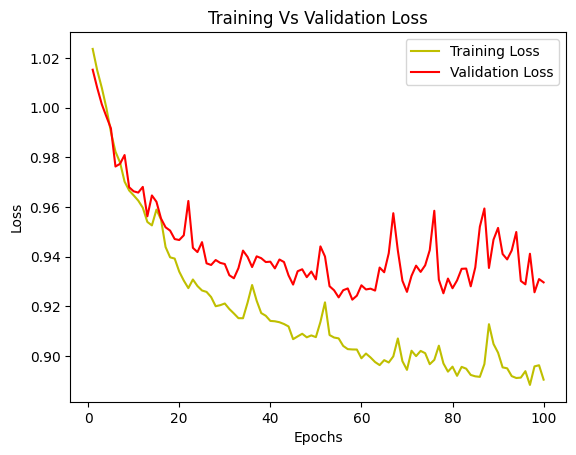

In [224]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

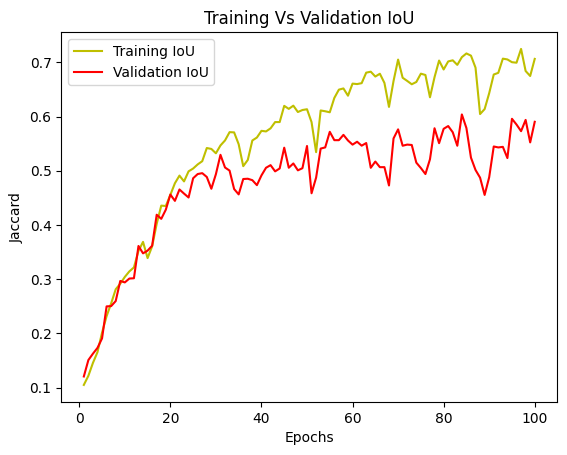

In [225]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Jaccard")
plt.legend()
plt.show()

In [226]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 20}

In [227]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 94ms/step


In [228]:
y_pred

array([[[[6.66210428e-02, 4.64022321e-07, 2.77295946e-08,
          3.34304554e-04, 9.33044136e-01, 6.76830011e-14],
         [2.07909686e-03, 2.34446642e-12, 3.39291719e-13,
          4.71420369e-09, 9.97920930e-01, 1.15430873e-25],
         [1.45722297e-04, 1.45808367e-17, 5.49905173e-19,
          1.05316709e-13, 9.99854207e-01, 1.75600076e-34],
         ...,
         [2.80631823e-03, 1.05172947e-10, 2.28619727e-12,
          6.75338718e-09, 9.97193694e-01, 1.20837476e-20],
         [6.49970723e-03, 2.30317165e-09, 1.82425644e-10,
          2.34104949e-08, 9.93500292e-01, 3.68336289e-18],
         [3.17053273e-02, 7.03777778e-06, 1.08060260e-06,
          1.27307703e-05, 9.68273878e-01, 2.14798873e-11]],

        [[1.73525885e-02, 2.89791585e-12, 3.69536995e-14,
          1.89530187e-08, 9.82647359e-01, 1.56076207e-26],
         [2.95714563e-04, 8.20546123e-21, 1.63419794e-22,
          6.66576681e-17, 9.99704301e-01, 0.00000000e+00],
         [2.99531021e-05, 7.59573057e-27, 5.7242

In [229]:
y_pred_argmax = np.argmax(y_pred, axis=3) # predicition for each label

In [230]:
len(y_pred_argmax)

54

In [231]:
y_pred_argmax # what are the classes predicted for each image

array([[[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 4, 4, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 3, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[3, 3, 0, ..., 3, 3, 3],
        [1, 3, 0, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [0, 0, 1, ..., 1, 1, 1]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 

In [232]:
y_test_argmax = np.argmax(y_test, axis=3)

In [233]:
y_test_argmax

array([[[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 

In [234]:
import random

In [235]:
test_image_number = random.randint(0, len(X_test))# generate random image

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 32ms/step


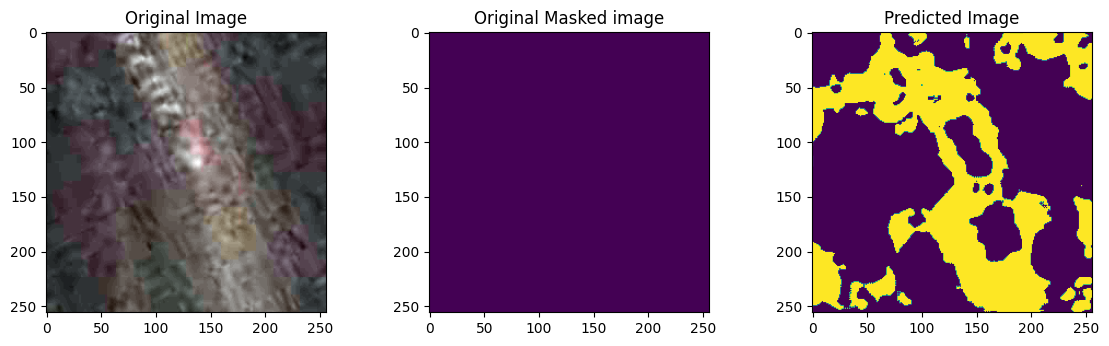

In [236]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [237]:
!ls -lah

total 5.1M
drwx------  15 lennart.giessing prw-polver    22 Aug 21 11:22 .
drwxr-xr-x 292 root             root         293 Aug 19 22:41 ..
-rw-r--r--   1 lennart.giessing prw-polver  3.2M Aug 21 11:09 0_forest_detection_chaco.ipynb
-rw-r--r--   1 lennart.giessing prw-polver 1010K Aug 21 11:17 1_multilable_image_transf.ipynb
-rw-r--r--   1 lennart.giessing prw-polver  1.2M Aug 21 11:20 2_multilable_training.ipynb
drwxr-xr-x   5 lennart.giessing prw-polver     5 Jul 30 11:26 .cache
-rw-r--r--   1 lennart.giessing prw-polver   403 Jul 30 11:54 client_secret_533909638574-hu7dd08fd963o3ra894h3re2qolt3v8i.apps.googleusercontent.com.json
drwxr-xr-x   3 lennart.giessing prw-polver     4 Jul 30 11:26 .config
drwxr-xr-x   2 lennart.giessing prw-polver     3 Jul 12 18:15 .cups
drwxr-xr-x   6 lennart.giessing prw-polver     6 Aug  9 14:12 Forest
-rw-r--r--   1 lennart.giessing prw-polver    33 Jul 12 18:15 .forward
drwxr-xr-x   5 lennart.giessing prw-polver     5 Aug  9 14:03 Ice
drwxr-xr-x   2 l

In [240]:
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import load_model
#plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)
saved_model = load_model('models/multilable_saved_model.h5', custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                                                       'jaccard_coef':jaccard_coef})

# Print the model summary to verify it's loaded correctly
saved_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [241]:
model.loss.name

'dice_loss_plus_1focal_loss'

1/1 [==============================] - 0s 35ms/step


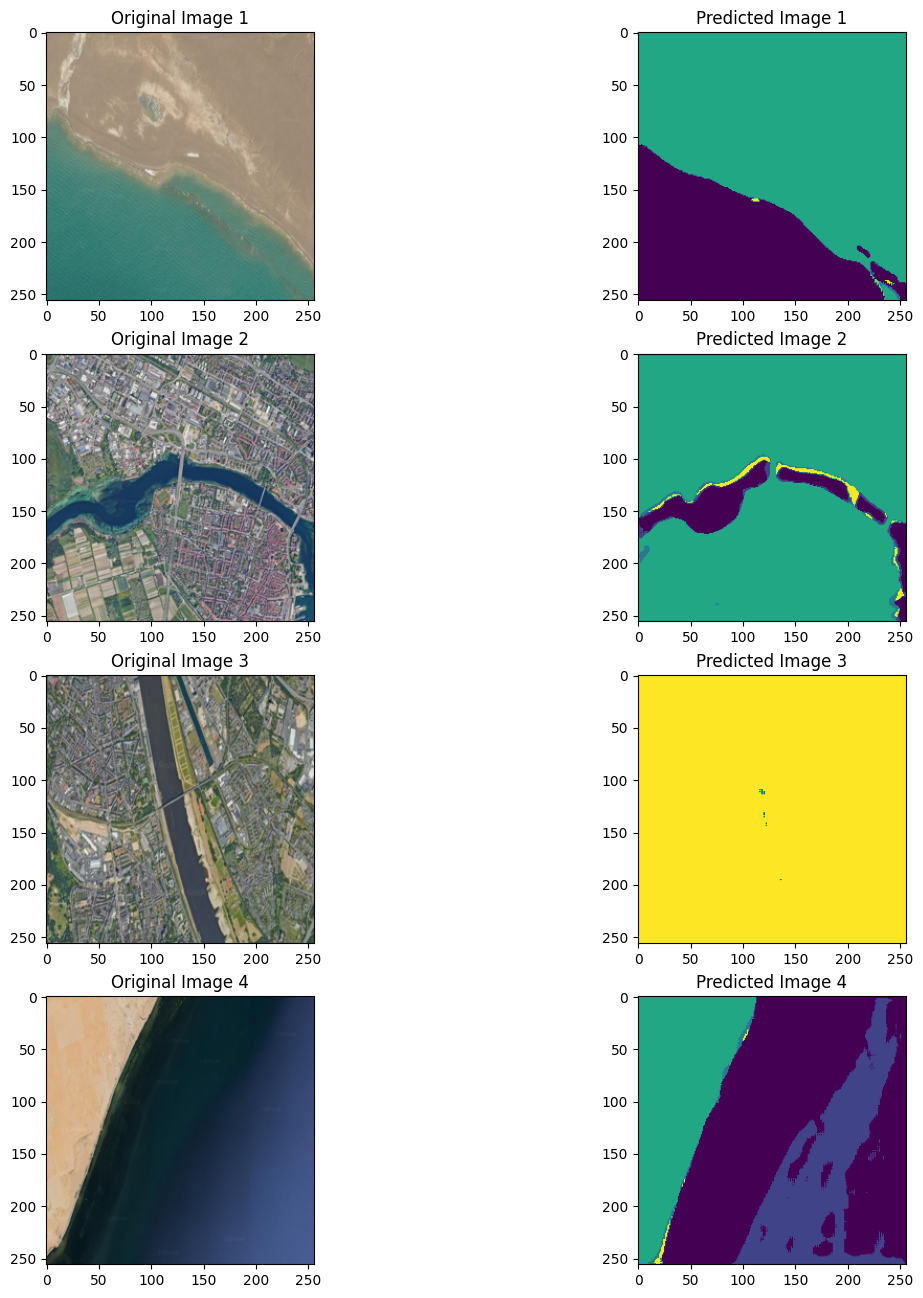

In [242]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing the images
image_folder = './pictures_masks/tries_multilable'

# Get all image file paths in the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))

# List to hold predictions and original images
original_images = []
predicted_images = []

# Load, preprocess, and predict for each image
for image_path in image_paths:
    image = Image.open(image_path)
    image = image.resize((256, 256))
    image_array = np.array(image)
    image_array = np.expand_dims(image_array, 0)

    # Make the prediction using saved_model
    prediction = model.predict(image_array)
    predicted_image = np.argmax(prediction, axis=3)[0, :, :]

    original_images.append(image)
    predicted_images.append(predicted_image)

# Plot the original and predicted images side by side
plt.figure(figsize=(14, 8 * len(image_paths) // 2))

for i, (original, predicted) in enumerate(zip(original_images, predicted_images)):
    plt.subplot(len(image_paths), 2, 2 * i + 1)
    plt.title(f"Original Image {i + 1}")
    plt.imshow(original)

    plt.subplot(len(image_paths), 2, 2 * i + 2)
    plt.title(f"Predicted Image {i + 1}")
    plt.imshow(predicted)

plt.show()
